### Exploratory Data Analysis - Matches Dataset
Data Scientist - M Ravi Shankar

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
    
    
4. [Questions](#section4)
    - 4.1 [How many matches we’ve got in the dataset?](#section401)<br/>
    - 4.2 [How many seasons we’ve got in the dataset?](#section402)<br/>
    - 4.3 [Which is the most successful IPL Team?](#section403)<br/>
    - 4.4 [Who are the top players of matches?](#section404)<br/>
    - 4.5 [Which Team had won by maximum runs?](#section405)<br/>
    - 4.6 [Which Team had won by maximum wicket?](#section406)<br/>
    - 4.7 [Has Toss-winning helped in winning matches?](#section407)<br/>
    - 4.8 [Which Season had most number of matches?](#section408)<br/>
    - 4.9 [Number of matches played in different cities?](#section409)<br/>
    - 4.10 [Which stadium is best suitable for first batting?](#section410)<br/>
    - 4.11 [Which stadium is best suitable for first bowling?](#section411)<br/>
    - 4.12 [Matches played and matches won by each team?](#section412)<br/>
    - 4.13 [How team has won the match when Duckworth Lewis method was applied?](#section413)<br/>
    - 4.14 [Establish a correlation between all the features using heatmap](#section414)<br/>
    - 4.15 [Hypothesis](#section415)<br/>
    

5. [Conclusions](#section5)<br/>

<a id=section1></a>
### 1. Problem Statement

Indian Premier League (IPL)is one of the most popular tournaments in the world. There is a huge franchise money involved in IPL, hence there is lot of pressure on team management and players to perform well in every match. 

Always they need to strive for excellence by taking appropriate decisions in selecting players, understanding oppositions strong and weak points, studying pitch conditions. All these will be possible only by studying the historical data. Here data sciencits can play very vital role.

<a id=section2></a> 
### 2. Data Loading and Description

- The dataset consists of the information about __IPL (Indian Premier League)__. Various variables present in the dataset includes data of season, city, teams,venue,umpire, win_by_wicket and Win_by_runs etc.


- The dataset comprises of __696 observations of 18 columns__. Below is a table showing names of all the columns and their description.

| Column Name    | Description                                               |
| -------------  |:-------------                                            :| 
| ID             | ID numbers                                                | 
| Season         | Season Details                                            |  
| City           | City to which team belongs                                | 
| Date           | Date of the match played                                  |   
| Team1          | One of the team played in the match                       |
| Team2          | One of the team played in the match                       |
| Toss_winner    | Team who won the toss                                     |
| Toss Decision  | Decision taken by toss winning captain to bat or bowl     |
| Result         | Result of the match                                       |
| Win_by_runs    | Won by no of runs                                         |
| Win_by_wickets | Won by no of wickets                                      |
| Player_of_match| Name of the player who won the player of the match award  |
| Venue          | Venue of the match played                                 |
| Umpire1        | One of the Umpire in the match                            |
| Umpire2        | One of the Umpire in the match                            |
| Umpire3        | 3rd Umpire in the match                                   |

#### Some Background Information

__IPL (Indian Premier League)__ is one of the most popular tournaments in the world, organized by __BCCI__.

Cricket is a bat-and-ball game played between two teams of eleven players each on a cricket field, at the centre of which is a rectangular __20-metre (22-yard) pitch__ with a target at each end called the __wicket__ (a set of three wooden stumps upon which two bails sit). Each phase of play is called an __innings__, during which one team bats, attempting to score as many runs as possible, whilst their opponents bowl and field, attempting to minimise the number of runs scored. When each innings ends, the teams usually swap roles for the next innings (i.e. the team that previously batted will bowl/field, and vice versa). The teams each bat for one or two innings, depending on the type of match. The winning team is the one that scores the most runs, including any extras gained (except when the result is not a win/loss result).

The Indian Premier League (IPL), officially Vivo Indian Premier League for sponsorship reasons, is a professional franchise-based Twenty20 cricket league in India contested during April and May of every year by teams representing 8 Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in __2008__.

Currently, with eight teams, each team plays each other twice in a home-and-away round-robin format in the league phase. At the conclusion of the league stage, the top four teams will qualify for the playoffs. The top two teams from the league phase will play against each other in the first Qualifying match, with the winner going straight to the IPL final and the loser getting another chance to qualify for the IPL final by playing the second Qualifying match. Meanwhile, the third and fourth place teams from league phase play against each other in an eliminator match and the winner from that match will play the loser from the first Qualifying match. The winner of the second Qualifying match will move onto the final to play the winner of the first Qualifying match in the IPL Final match, where the winner will be crowned the Indian Premier League champions. The squad strength must be between 18 and 25 players, with a maximum of 8 overseas players. A team can play a maximum of __4 overseas players__ in their playing eleven.

#### Importing Packages

In [28]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing DataSet

In [91]:
matches_data=pd.read_csv("C:/Users/Ravi/Desktop/Python files/Project/matches.csv")

<a id=section3></a> 
## 3. Data Profiling

- We will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a> 
### 3.1 Understaing the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

In [92]:
matches_data.shape                         # This will print the number of rows and comlumns of the Data Frame

(696, 18)

matches_data has __696 rows and 18 columns__.

In [93]:
matches_data.columns                  # This will print names of all the comlumns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [94]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [95]:
matches_data.tail()                 # This will print the last n rows of the Data Frame

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [96]:
matches_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [97]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [98]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that __city__ column has 7 nulls, __winner__ and __player of the match__ has 3 nulls, __Umpire1__ and __Umpire2__ has 1 null each and __Umpire3__ contains __maximum nulls__.

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [99]:
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matches_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file 
as __matches_before_preprocessing.html__.

Take a look at the file and see what useful insight we can develop from it. Now we will process our data to better
understand it.

<a id=section303></a>
### 3.3 Pre Processing

- Dealing with values<br/>
    - Replacing missing entries of __City, Umpire1__ and __Umpire2__.
    - We have 3 missing values in __Winner__. This should be null for the matches when there is 'no result'. If that         is the case replace null with 'None'.
    - We have 3 missing values in __Player of the match__. This should be null for the matches when there is 'no             result'. If that is the case replace null with 'None'
    - Droping the column __Umpire3__ as it has too __many null values__.

In [101]:
print(matches_data[matches_data['city'].isnull()])

      id  season city        date                        team1  \
461  462    2014  NaN  2014-04-19               Mumbai Indians   
462  463    2014  NaN  2014-04-19        Kolkata Knight Riders   
466  467    2014  NaN  2014-04-23          Chennai Super Kings   
468  469    2014  NaN  2014-04-25          Sunrisers Hyderabad   
469  470    2014  NaN  2014-04-25               Mumbai Indians   
474  475    2014  NaN  2014-04-28  Royal Challengers Bangalore   
476  477    2014  NaN  2014-04-30          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462             Delhi Daredevils        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468             Delhi Daredevils          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat 

Venue of all the missing values of __City__ is Dubai International Cricket Stadium, which is located in __Dubai city__. 

In [104]:
matches_data.city.fillna("Dubai", inplace=True) #All the missing values in City is replaced with Dubai

In [105]:
matches_data.umpire1 = matches_data.umpire1.fillna(matches_data['umpire1'].mode()[0]) #Replacing missing value with mode

In [106]:
matches_data.umpire2 = matches_data.umpire2.fillna(matches_data['umpire2'].mode()[0])#Replacing missing value with mode

In [108]:
matches_data.drop('umpire3', axis=1, inplace=True) #Dropping umpire3 column

In [109]:
print(matches_data[matches_data['player_of_match'].isnull()]) #Provide the details of matches where player of the match is missing
print(matches_data[matches_data['winner'].isnull()]) #Provide the details of matches where winner is missing

      id  season       city        date                        team1  \
300  301    2011      Delhi  2011-05-21             Delhi Daredevils   
545  546    2015  Bangalore  2015-04-29  Royal Challengers Bangalore   
570  571    2015  Bangalore  2015-05-17             Delhi Daredevils   

                           team2                  toss_winner toss_decision  \
300                Pune Warriors             Delhi Daredevils           bat   
545             Rajasthan Royals             Rajasthan Royals         field   
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result           0    NaN            0               0   
545  no result           0    NaN            0               0   
570  no result           0    NaN            0               0   

    player_of_match                  venue          umpire1       umpire2  
300             NaN       Feroz Shah Kotla        SS 

We can see __Player of the match__ and __Winner__ details are missing for 3 matches which are ended with no results.

In [110]:
# Update null values for 'winner' and 'player_of_match' for 'no result' match to 'None'.
matches_data['winner'] = matches_data.winner.fillna("None")
matches_data['player_of_match'] = matches_data.player_of_match.fillna("None")

In [111]:
matches_data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

'Rising Pune Supergiants' and 'Rising Pune Supergiant' are same team, however it is showing as 2 teams due to typo in one of the team name.

In [112]:
# correct value for Rising Pune Supergiants
matches_data.replace(to_replace='Rising Pune Supergiants',value='Rising Pune Supergiant',regex=True,inplace=True)

<a id=section304></a>
### 3.4 Post Pandas Profiling

In [113]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(matches_data)
profile.to_file(outputfile="matches_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values in City, Winner, Player_of_match,  Umpire1 and Umpire2 columns. Now we will compare the two reports, i.e __matches_after_preprocessing.html__ and matches_before_preprocessing.html.<br/>
In matches_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __17__

<a id=section4></a>
### 4. Questions

<a id=section401></a>
### 4.1 How many matches we have got in the dataset?

As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable id.

In [116]:
matches_data['id'].count()

696

<a id=section402></a>
### 4.2 How many seasons we have got in the dataset?

IPL is conducted once in a year and so getting the number of unique years we have got in dataset will tell us how many seasons we have got in the dataset.

In [117]:
len(matches_data['season'].unique())

11

IPL was conducted for 11 seasons till date.

<a id=section403></a>
### 4.3 Which is the most successful IPL Team?

The most successful IPL team is the team that has won most number of times.

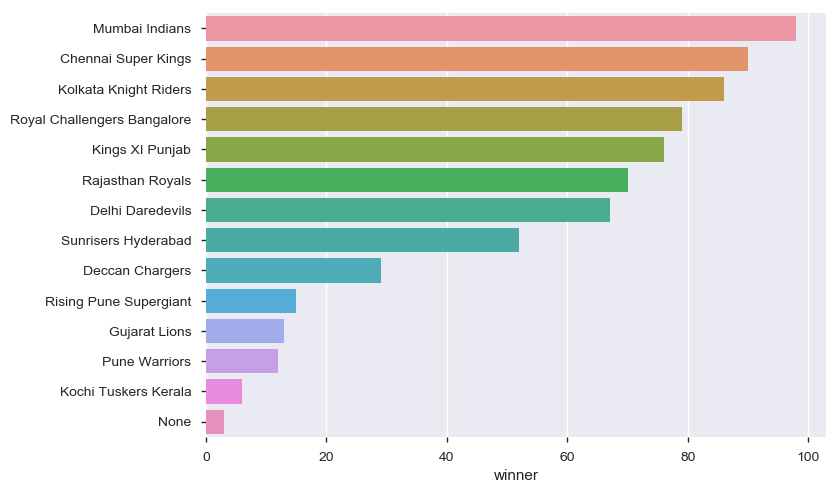

In [118]:
#sns.countplot(y='winner', data = matches)
#plt.show
data = matches_data.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

With above graph we see that __Mumbai Indians__ is most successful IPL Team.

### 4.4 Who are the Top player of matches?            

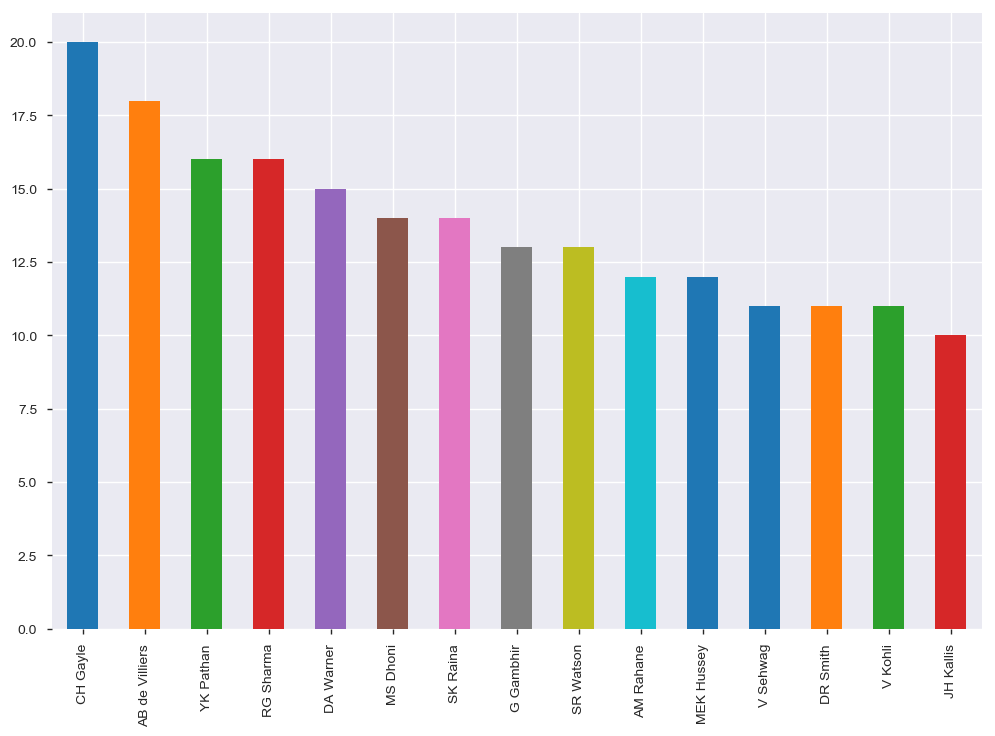

In [135]:
matches_data.player_of_match.value_counts().head(15).plot.bar(figsize=(12,8))

Top __15__ players of __IPL__.

<a id=section405></a>
### 4.5 Which team had won by maximum runs?

To find answer for this question, we can divide the question logically — first we need to find maximum runs, then we can find the row (winning team) with this maximum runs — which would indeed be the team won by maximum runs. 

I’d like to emphasis here that it’s always important to divide problem into logical sub-problems or modules and then build Python expressions/codes for those sub-modules finally adding them up to required code that will result in the solution.

In [120]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()] ['winner']

'Mumbai Indians'

idxmax will return the id of the maximumth value which in turn is fed into iloc that takes an index value and returns the value.

__Mumbai Indians__ team had won by maximum runs

<a id=section406></a>
### 4.6 Which team had won by maximum wickets?

In [121]:
matches_data.iloc[matches_data['win_by_wickets'].idxmax()] ['winner']

'Kolkata Knight Riders'

__Kolkata Kinight__ Riders team won by maximum wickets.

<a id=section407></a>
### 4.7 Has toss winning helped the team in winning match?

To find answer to this question, lets divide the problem into two chunks.
match winner and toss winner if both of them are same — then it’s a success and if not it’s a failure. Before visualizing the outcome, let us first see how the numbers look.

In [122]:
data = matches_data['toss_winner']== matches_data['winner']
data.groupby(data).size()

False    339
True     357
dtype: int64

With above results we can say there is a correlation between toss and match winning ahd so we assume that it helps.

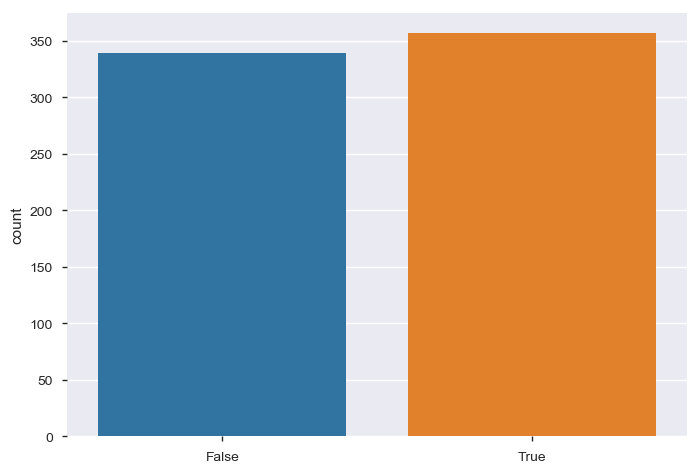

In [123]:
# Let's visualize the above results
sns.countplot(matches_data['toss_winner'] == matches_data['winner'])
sns.countplot(data);

<a id=section408></a>
### 4.8 Which season had most number of matches?

We know that if each row is a match, then counting the number of instances/rows of every season would give us the number of matches for every season.

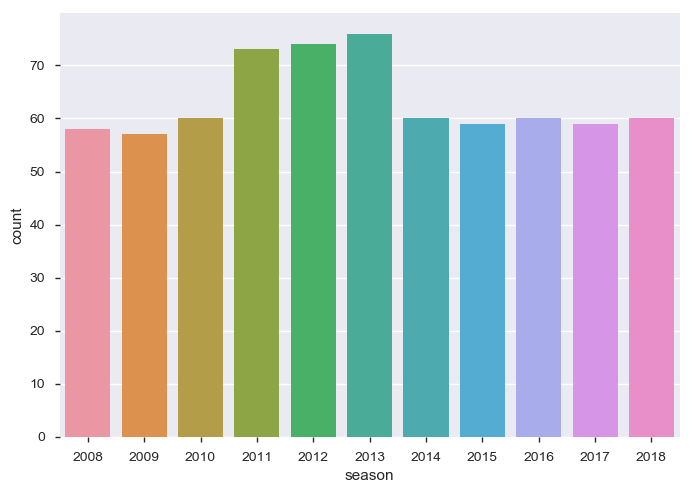

In [124]:
sns.countplot(x='season', data=matches_data)
plt.show()

__2013__ has the most number of matches.

<a id=section409></a>
### 4.9 Number of matches played in different cities?

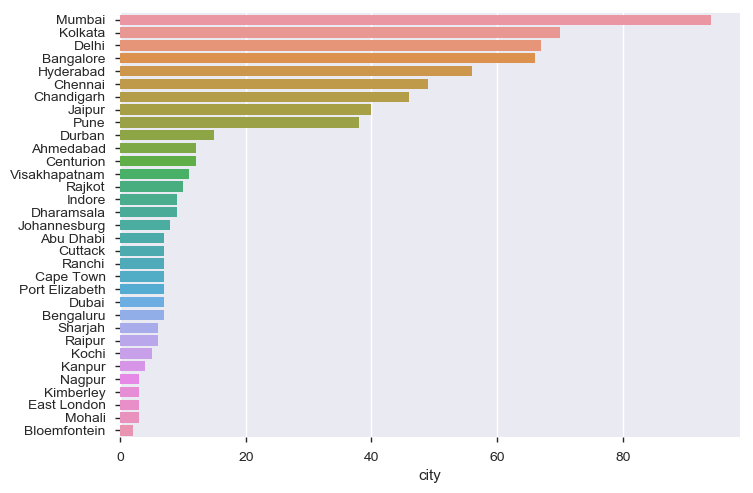

In [125]:
#sns.countplot(y='city', data = matches)
#plt.show
data = matches_data.city.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

<a id=section410></a>
### 4.10 Which stadium is best suitable for first batting?

In [126]:
matches_data.venue[matches_data.win_by_runs!=0].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

__Feroz Shah Kotla__ and __Wankhede Stadiums__ are best suitable for first batting

<a id=section411></a>
### 4.11 Which stadium is best suitable for first bowling?

In [127]:
matches_data.venue[matches_data.win_by_wickets!=0].mode()

0    Eden Gardens
dtype: object

__Eden Gardens__ stadium is best suitable for first bowling

<a id=section412></a>
### 4.12 Matches played and Matches won by each team?

In [129]:
# Matched played and Matches Won by Team
pd_match_won = pd.DataFrame()
pd_match_played = pd.DataFrame()
pd_match_won = matches_data['winner'].value_counts().reset_index().rename(columns={'index':'Team','winner':'Matches Won'})
pd_match_played = matches_data[['team1','team2']].stack().reset_index().groupby(0).count().reset_index().rename(columns ={0:'Team','level_0':'Matches Played'})
pd_match_played.merge(pd_match_won,on='Team')[['Team','Matches Played','Matches Won']]

,Team,Matches Played,Matches Won
0,Chennai Super Kings,147,90
1,Deccan Chargers,75,29
2,Delhi Daredevils,161,67
3,Gujarat Lions,30,13
4,Kings XI Punjab,162,76
5,Kochi Tuskers Kerala,14,6
6,Kolkata Knight Riders,164,86
7,Mumbai Indians,171,98
8,Pune Warriors,46,12
9,Rajasthan Royals,133,70


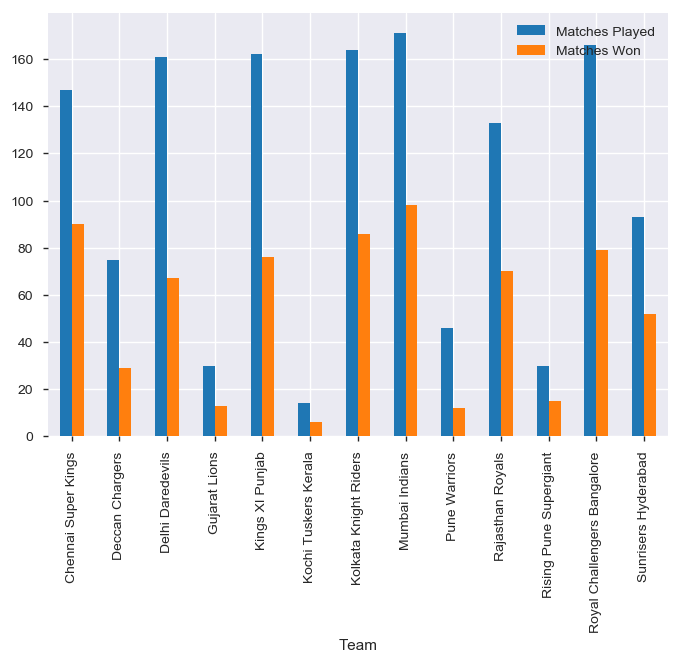

In [131]:
#Lets visualize above results in Matplots
pd_match_played.merge(pd_match_won,on='Team').plot(x='Team',y=['Matches Played','Matches Won'],kind='bar')

__Mumbai__ and __Chennai__ are top 2 teams based on winning the matches.

<a id=section413></a>
### 4.13 How team has won the match when Duckworth Lewis method was applied

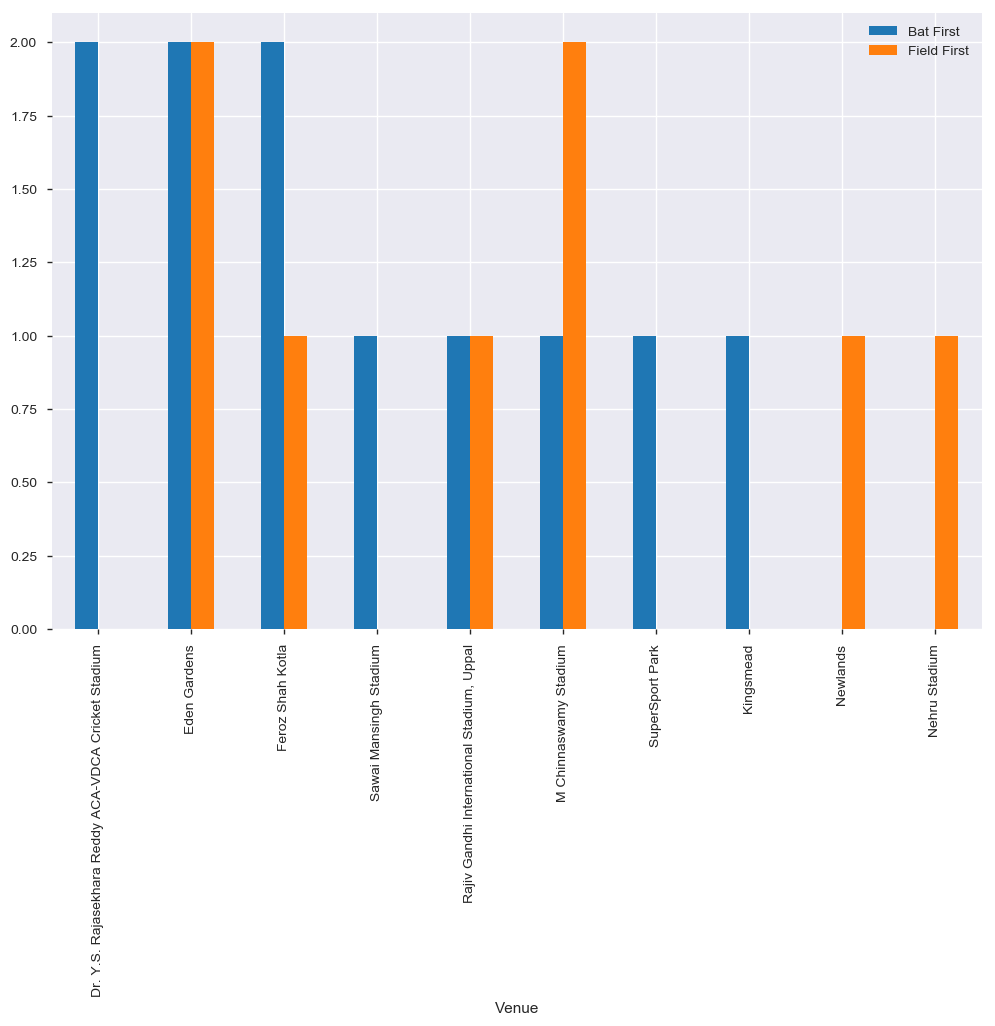

In [133]:
# How team has won the match at venue when Duckworth Lewis method has applied
won_bat_first = pd.DataFrame()
won_field_first = pd.DataFrame()
won_field_first = matches_data[(matches_data.dl_applied == 1) & (matches_data.win_by_wickets > 0)].venue.value_counts().reset_index().rename(columns={'index':'Venue','venue':'Field First'})
won_bat_first = matches_data[(matches_data.dl_applied == 1) & (matches_data.win_by_runs > 0)].venue.value_counts().reset_index().rename(columns={'index':'Venue','venue':'Bat First'})
won_bat_first.merge(won_field_first,on='Venue',how='outer').plot(x='Venue',y=['Bat First','Field First'],kind='bar',figsize=(12,8))

<a id=section414></a>
### 4.14 Establish correlation between all the features using heatmap

Text(0.5, 1.0, 'Correlation between features')

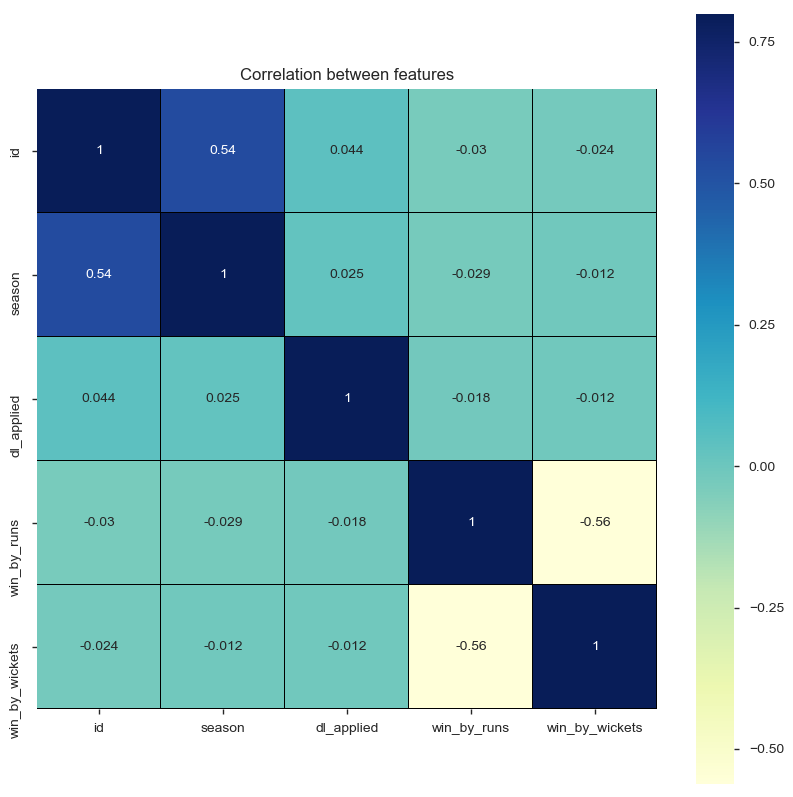

In [114]:
corr = matches_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

<a id=section415></a>
### 4.15 Hypothesis: Mumbai and Chennai are most successful Teams in IPL

On studying Questionnaire 4.3, 4.12 we observed that most number of matches won in IPL are  __Mumbai & Chennai__ teams in all the seasons.
- __Mumbai__ won __98 Matches__ overall in IPL.
- __Chennai__ won __90 Matches__ overall in IPL.
- __Kochi__ won only __6 Matches__ overall in IPL.<br/>

Also we have seen toss winners have more chance of winning the match. In terms of winning ratio Chennai has got highest. (__Chennai - 61% and Mumbai - 57%__) 

<a id=section5></a>
### 5. Conclusion:

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the     
  data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the  
  data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the  
  various features present in the dataset.
- Bengaluru, Kolkata, Delhi, Mumbai and Hydrabad are the venues where more than 50 matches has been played in IPL in     11 seasons. (__Section 4.9__)
- Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders are the most successful teams in IPL.
  (__Section 4.12__)
- Mumbai Indians has won more number of matches in IPL. (__Section 4.3__). This section shows performance of  
  each team in IPL.
- CH Gayle, AB de Villiers, YK Pathan and RG Sharma are top performers of the teams and has won maximum Man of the 
  Match Awards.(__Section 4.4__)

- From the analysis, it has concluded that below are the factors to win the matches.
   - Opposition Team, venue and winning the toss are some of the factors to win the match (__Section 4.7,4.10 & 
     4.11__ ).
   - Toss winner has won only 51.6% of the IPL matches. So just winning the toss is not the complete criteria for 
     winning the match.
   - Team Field first has won 54.1% of the matches while batting first team has won 45.9% of the matches. 
   - After winning the toss, selecting Bat First or Field First is also the important factor.
   - Kolkata Knight Riders, Royal Challengers Bangalore, Rajasthan Royals and Delhi Daredevils has won most of the 
     matches when they Field First. So they are good in chasing the score as comapred to other teams.
   - Another criteria is pitch (matches played at venue) past record of winning team, to decide whether to Bat First 
     or to select Field first. 
   - Rain Forecast (Duckworth Lewis method), as seen in (__Section 4.13__), if there is Rain forecast in the venue 
     then based on past winning record, team has to decide whether to Bat First or Field First after winning the toss.
   - Selection of Top performer players. Sections (__Section 4.4__) provides information about top performer players      in IPL and in venue. 